In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
mydata=pd.read_csv("House_Price.csv.csv")

In [3]:
mydata

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,price
0,3,1,1180,5650,1,221900
1,3,2,2570,7242,2,538000
2,2,1,770,10000,1,180000
3,4,3,1960,5000,1,604000
4,3,2,1680,8080,1,510000
...,...,...,...,...,...,...
21608,3,3,1530,1131,3,360000
21609,4,3,2310,5813,2,400000
21610,2,1,1020,1350,2,402101
21611,3,3,1600,2388,2,400000


# Printing the data information

In [4]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   bedrooms     21613 non-null  int64
 1   bathrooms    21613 non-null  int64
 2   sqft_living  21613 non-null  int64
 3   sqft_lot     21613 non-null  int64
 4   floors       21613 non-null  int64
 5   price        21613 non-null  int64
dtypes: int64(6)
memory usage: 1013.2 KB


# Data Description

In [5]:
mydata.describe()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,price
count,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,2.161300e+04
mean,3.370842,2.312543,2079.899736,1.510697e+04,1.542405,5.400881e+05
std,0.930062,0.865405,918.440897,4.142051e+04,0.567504,3.671272e+05
min,0.000000,0.000000,290.000000,5.200000e+02,1.000000,7.500000e+04
25%,3.000000,2.000000,1427.000000,5.040000e+03,1.000000,3.219500e+05
50%,3.000000,2.000000,1910.000000,7.618000e+03,2.000000,4.500000e+05
75%,4.000000,3.000000,2550.000000,1.068800e+04,2.000000,6.450000e+05
max,33.000000,8.000000,13540.000000,1.651359e+06,4.000000,7.700000e+06


# Checking for null values

In [6]:
mydata.isnull().sum()

bedrooms       0
bathrooms      0
sqft_living    0
sqft_lot       0
floors         0
price          0
dtype: int64

# Performing Correlation

In [7]:
mydata_corr=mydata.corr()
mydata_corr

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,price
bedrooms,1.000000,0.492322,0.576671,0.031703,0.182485,0.308350
bathrooms,0.492322,1.000000,0.719901,0.077230,0.453929,0.475331
sqft_living,0.576671,0.719901,1.000000,0.172826,0.329975,0.702035
sqft_lot,0.031703,0.077230,0.172826,1.000000,-0.001193,0.089661
floors,0.182485,0.453929,0.329975,-0.001193,1.000000,0.258001
price,0.308350,0.475331,0.702035,0.089661,0.258001,1.000000


# Performing Different kinds of graphs using Correlation values of dependent and independent variables

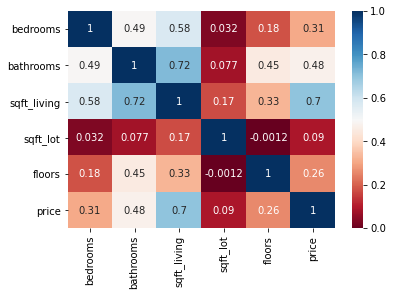

In [8]:
sns.heatmap(mydata_corr,annot=True,cmap='RdBu');

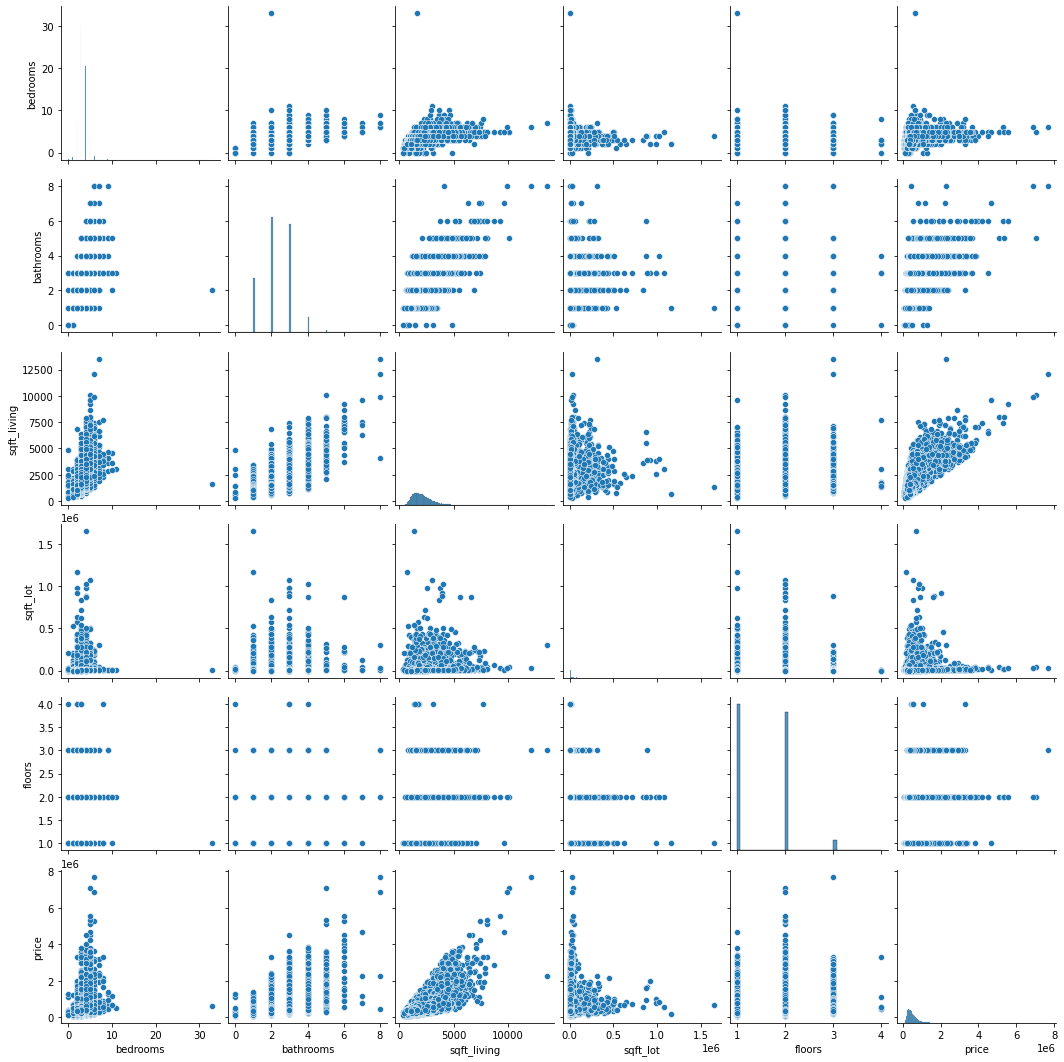

In [9]:
sns.pairplot(mydata);

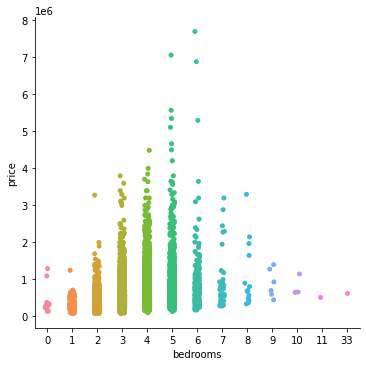

In [10]:
sns.catplot(x='bedrooms',y='price',data=mydata);

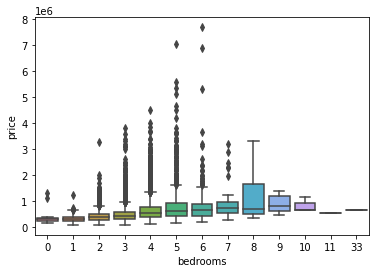

In [11]:
sns.boxplot(x="bedrooms",y="price",data=mydata);

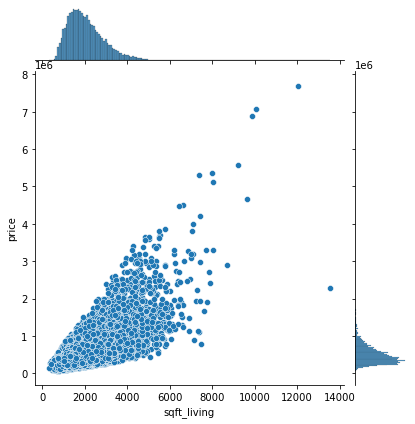

In [12]:
sns.jointplot(x="sqft_living",y="price",data=mydata);

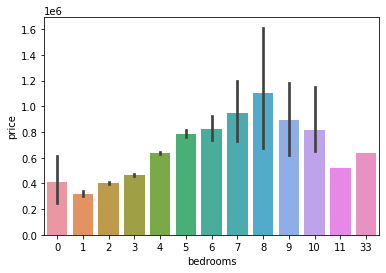

In [13]:
sns.barplot(x='bedrooms',y='price',data=mydata);

# Seperating Dependent values from the Dataset

In [14]:
y_dep=mydata.price

In [15]:
y_dep

0        221900
1        538000
2        180000
3        604000
4        510000
          ...  
21608    360000
21609    400000
21610    402101
21611    400000
21612    325000
Name: price, Length: 21613, dtype: int64

# Seperating Independent values from the Dataset

In [16]:
x_ind = mydata.drop("price",axis=1)

In [17]:
x_ind

,bedrooms,bathrooms,sqft_living,sqft_lot,floors
0,3,1,1180,5650,1
1,3,2,2570,7242,2
2,2,1,770,10000,1
3,4,3,1960,5000,1
4,3,2,1680,8080,1
...,...,...,...,...,...
21608,3,3,1530,1131,3
21609,4,3,2310,5813,2
21610,2,1,1020,1350,2
21611,3,3,1600,2388,2


# checking pvalue

In [18]:
import statsmodels.api as sm

In [19]:
model=sm.OLS(y_dep,x_ind)

In [20]:
my_fit=model.fit()

In [21]:
my_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.845
Model:                            OLS   Adj. R-squared (uncentered):              0.845
Method:                 Least Squares   F-statistic:                          2.352e+04
Date:                Tue, 24 Aug 2021   Prob (F-statistic):                        0.00
Time:                        14:15:54   Log-Likelihood:                     -2.9992e+05
No. Observations:               21613   AIC:                                  5.999e+05
Df Residuals:                   21608   BIC:                                  5.999e+05
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
bedrooms    -4.195e+04   1798.147    -23.329      0.000   -4.55e+04   -3.84e+04
bathrooms   -2.337e+04   3106.713     -7.524      0.000   -2.95e+04   -1.73e+04
sqft_living   324.7097      2.975    109.141      0.000     318.878     330.541
sqft_lot       -0.3486      0.043     -8.103      0.000      -0.433      -0.264
floors       4.002e+04   3138.743     12.750      0.000    3.39e+04    4.62e+04
==============================================================================
Omnibus:                    13945.067   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           457933.849
Skew:                           2.609   Prob(JB):                         0.00
Kurtosis:                      24.938   Cond. No.                     9.37e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 9.37e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [22]:
#Rsquare value is 0.845 which indicates the data performance moves relatively in line with the index.

# Predicting the Price

In [23]:
# bedrooms=3,bathrooms=3,sqft_living=3000,sqft_lot=9000,floors=5,price=??
my_fit.predict([[3,3,3000,9000,5]]).round()

array([975119.])

# Machine Learning

In [24]:
import sklearn #skikit learn library use for machine learning in python

In [25]:
from sklearn import model_selection
from sklearn.model_selection import train_test_split

In [26]:
x_train,x_test,y_train,y_test=train_test_split(x_ind,y_dep,train_size=0.8,random_state=1)

In [27]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [28]:
model=LinearRegression()

In [29]:
model.fit(x_train,y_train) # here we are fitting the 80% of test_train values into the model

LinearRegression()

In [30]:
y_pred=model.predict(x_test)  # here, by using the 20% of the test values we are finding the machine predicted values

In [31]:
y_pred

array([ 731166.67967967,  409898.60570827,  669252.27860536, ...,
        478178.6756901 , 1472510.04262517,  363850.45769105])

# Creating Dataframes for Actual values and Machine_pred Values

In [32]:
f_comp = pd.DataFrame({"Actual":y_test,"Machine_Pred":y_pred})

In [33]:
f_comp

,Actual,Machine_Pred
15544,459000,7.311667e+05
17454,445000,4.098986e+05
21548,1057000,6.692523e+05
3427,732350,5.637444e+05
8809,235000,4.046212e+05
...,...,...
13597,965000,9.325628e+05
9648,359950,5.967553e+05
18627,260000,4.781787e+05
9553,1795000,1.472510e+06


# Residual
Residual is the difference between Machine Predicted values and Actual values

In [34]:
res=y_pred-y_test
res

15544    272166.679680
17454    -35101.394292
21548   -387747.721395
3427    -168605.577382
8809     169621.229544
             ...      
13597    -32437.221776
9648     236805.299227
18627    218178.675690
9553    -322489.957375
14200    -54149.542309
Name: price, Length: 4323, dtype: float64

# Comparison graph (Actual values,Machine_pred values)

In [35]:
comp_g=f_comp.head(23)

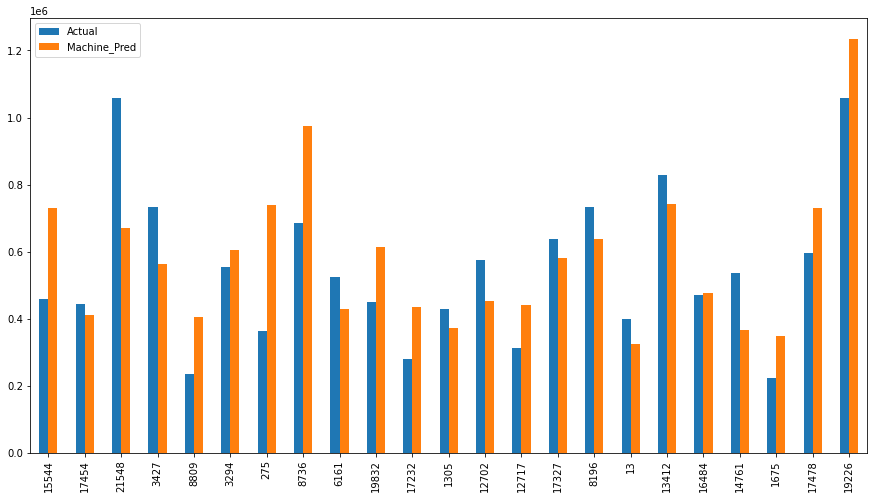

In [36]:
comp_g.plot(kind="bar",figsize=(15,8));

# Distribution Graph
To see how the predicted and actual vales distributed together

C:\Users\SHYAM\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\SHYAM\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


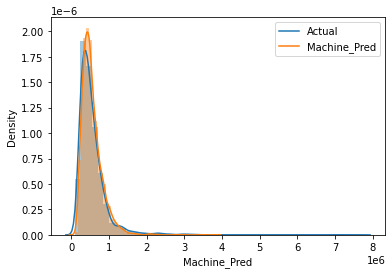

In [37]:
sns.distplot(f_comp["Actual"])
sns.distplot(f_comp["Machine_Pred"])
plt.legend(["Actual","Machine_Pred"])

In [38]:
#y=b0+b1x1+b2x2.....
#y is salary here
#b0 intercept

In [39]:
model.intercept_

72852.28035140212

In [40]:
model.coef_

array([-5.18189036e+04, -2.94525674e+04,  3.21273275e+02, -3.38172955e-01,
        2.99136103e+04])

In [41]:
#Price = 72852,-5.181(bedrooms),-2.94(bathrooms),+3.212(sqft_living),-3.381(sqft_plot),+2.99(floors)

# Assumptions in Linear Regression

In [42]:
#Linearity
#Homoscedastic
#no Autocorrection
#normality(error check)
#Multicollinearity

#we have 5 types of assumptions in Linear Regression from that we are using Linearity and Normality(error check)

((array([-3.59801667, -3.36038867, -3.22930113, ...,  3.22930113,
          3.36038867,  3.59801667]),
  array([-4221931.46193138, -4132071.61041102, -4123216.48079318, ...,
           965453.51862468,  1002997.08965975,  1530206.98421192])),
 (249171.33518121246, -3865.558779176547, 0.8659735742459443))

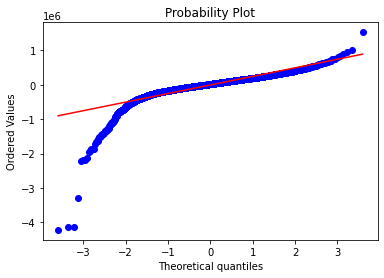

In [43]:
#normality(error check)
import scipy.stats as st
st.probplot(res,dist="norm",plot=plt)

In [44]:
# from the above graph we can assure that our prediction success rate is about 80% - 85%

C:\Users\SHYAM\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

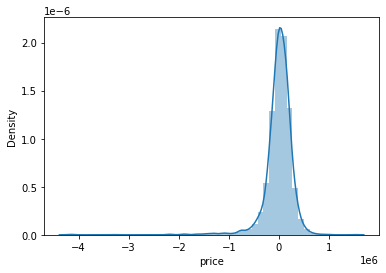

In [45]:
sns.distplot(res)

In [46]:
#from the distribution graph we got the bell shape and since there are more  negative value the success rate of the prediction 
# is given as 80%

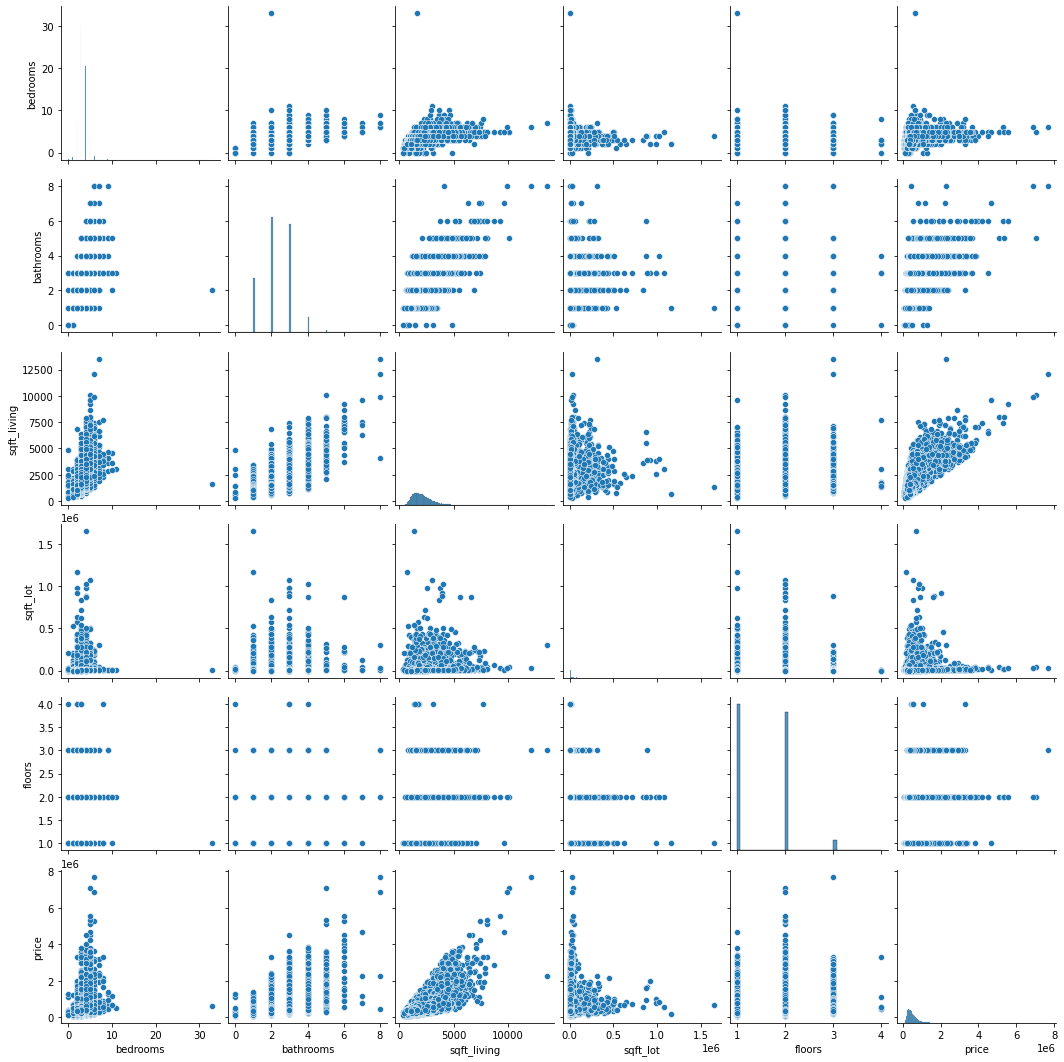

In [47]:
#Linearity
sns.pairplot(mydata)

# Mean square error

In [48]:
from sklearn.metrics import mean_squared_error

In [49]:
Error = mean_squared_error(y_test,y_pred)

In [50]:
Error

82680872234.52954